**FOOD LANCE**

*Collaborative Filtering on food recipes using K Nearest Neighbors Algorithm*

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#import seaborn as sns
#from sklearn.metrics.pairwise import cosine_similarity
#from sklearn.feature_extraction.text import CountVectorizer
from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import MinMaxScaler

In [4]:
df_recipes = pd.read_csv('/content/gdrive/MyDrive/Data/RAW_recipes.csv') #food recipe dataset
df_user_interaction= pd.read_csv('/content/gdrive/MyDrive/Data/RAW_interactions.csv') #user-food interaction dataset

In [5]:
df_recipes.head(10)

,name,id,minutes,contributor_id,submitted,tags,nutrition,n_steps,steps,description,ingredients,n_ingredients
0,arriba baked winter squash mexican style,137739,55,47892,2005-09-16,"['60-minutes-or-less', 'time-to-make', 'course...","[51.5, 0.0, 13.0, 0.0, 2.0, 0.0, 4.0]",11,"['make a choice and proceed with recipe', 'dep...",autumn is my favorite time of year to cook! th...,"['winter squash', 'mexican seasoning', 'mixed ...",7
1,a bit different breakfast pizza,31490,30,26278,2002-06-17,"['30-minutes-or-less', 'time-to-make', 'course...","[173.4, 18.0, 0.0, 17.0, 22.0, 35.0, 1.0]",9,"['preheat oven to 425 degrees f', 'press dough...",this recipe calls for the crust to be prebaked...,"['prepared pizza crust', 'sausage patty', 'egg...",6
2,all in the kitchen chili,112140,130,196586,2005-02-25,"['time-to-make', 'course', 'preparation', 'mai...","[269.8, 22.0, 32.0, 48.0, 39.0, 27.0, 5.0]",6,"['brown ground beef in large pot', 'add choppe...",this modified version of 'mom's' chili was a h...,"['ground beef', 'yellow onions', 'diced tomato...",13
3,alouette potatoes,59389,45,68585,2003-04-14,"['60-minutes-or-less', 'time-to-make', 'course...","[368.1, 17.0, 10.0, 2.0, 14.0, 8.0, 20.0]",11,['place potatoes in a large pot of lightly sal...,"this is a super easy, great tasting, make ahea...","['spreadable cheese with garlic and herbs', 'n...",11
4,amish tomato ketchup for canning,44061,190,41706,2002-10-25,"['weeknight', 'time-to-make', 'course', 'main-...","[352.9, 1.0, 337.0, 23.0, 3.0, 0.0, 28.0]",5,['mix all ingredients& boil for 2 1 / 2 hours ...,my dh's amish mother raised him on this recipe...,"['tomato juice', 'apple cider vinegar', 'sugar...",8
5,apple a day milk shake,5289,0,1533,1999-12-06,"['15-minutes-or-less', 'time-to-make', 'course...","[160.2, 10.0, 55.0, 3.0, 9.0, 20.0, 7.0]",4,"['combine ingredients in blender', 'cover and ...",NaN,"['milk', 'vanilla ice cream', 'frozen apple ju...",4
6,aww marinated olives,25274,15,21730,2002-04-14,"['15-minutes-or-less', 'time-to-make', 'course...","[380.7, 53.0, 7.0, 24.0, 6.0, 24.0, 6.0]",4,['toast the fennel seeds and lightly crush the...,my italian mil was thoroughly impressed by my ...,"['fennel seeds', 'green olives', 'ripe olives'...",9
7,backyard style barbecued ribs,67888,120,10404,2003-07-30,"['weeknight', 'time-to-make', 'course', 'main-...","[1109.5, 83.0, 378.0, 275.0, 96.0, 86.0, 36.0]",10,['in a medium saucepan combine all the ingredi...,this recipe is posted by request and was origi...,"['pork spareribs', 'soy sauce', 'fresh garlic'...",22
8,bananas 4 ice cream pie,70971,180,102353,2003-09-10,"['weeknight', 'time-to-make', 'course', 'main-...","[4270.8, 254.0, 1306.0, 111.0, 127.0, 431.0, 2...",8,"['crumble cookies into a 9-inch pie plate , or...",NaN,"['chocolate sandwich style cookies', 'chocolat...",6
9,beat this banana bread,75452,70,15892,2003-11-04,"['weeknight', 'time-to-make', 'course', 'main-...","[2669.3, 160.0, 976.0, 107.0, 62.0, 310.0, 138.0]",12,"['preheat oven to 350 degrees', 'butter two 9x...",from ann hodgman's,"['sugar', 'unsalted butter', 'bananas', 'eggs'...",9


In [6]:
df_recipes.shape

(231637, 12)

In [7]:
df_recipes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 231637 entries, 0 to 231636
Data columns (total 12 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   name            231636 non-null  object
 1   id              231637 non-null  int64 
 2   minutes         231637 non-null  int64 
 3   contributor_id  231637 non-null  int64 
 4   submitted       231637 non-null  object
 5   tags            231637 non-null  object
 6   nutrition       231637 non-null  object
 7   n_steps         231637 non-null  int64 
 8   steps           231637 non-null  object
 9   description     226658 non-null  object
 10  ingredients     231637 non-null  object
 11  n_ingredients   231637 non-null  int64 
dtypes: int64(5), object(7)
memory usage: 21.2+ MB


In [8]:
d = df_recipes.head(10)

In [9]:
df_recipes[['calories','total fat (PDV)','sugar (PDV)','sodium (PDV)','protein (PDV)','saturated fat (PDV)','carbohydrates (PDV)']] = df_recipes.nutrition.str.split(",",expand=True) 

In [10]:
df_recipes['calories'] =  df_recipes['calories'].apply(lambda x: x.replace('[',''))

In [11]:
df_recipes['carbohydrates (PDV)'] = df_recipes['carbohydrates (PDV)'].apply(lambda x:x.replace(']',''))

In [12]:
df_recipes[['calories','total fat (PDV)','sugar (PDV)','sodium (PDV)','protein (PDV)','saturated fat (PDV)','carbohydrates (PDV)']] = df_recipes[['calories','total fat (PDV)','sugar (PDV)','sodium (PDV)','protein (PDV)','saturated fat (PDV)','carbohydrates (PDV)']].astype('float')

In [13]:
df_recipes.head(10)

,name,id,minutes,contributor_id,submitted,tags,nutrition,n_steps,steps,description,ingredients,n_ingredients,calories,total fat (PDV),sugar (PDV),sodium (PDV),protein (PDV),saturated fat (PDV),carbohydrates (PDV)
0,arriba baked winter squash mexican style,137739,55,47892,2005-09-16,"['60-minutes-or-less', 'time-to-make', 'course...","[51.5, 0.0, 13.0, 0.0, 2.0, 0.0, 4.0]",11,"['make a choice and proceed with recipe', 'dep...",autumn is my favorite time of year to cook! th...,"['winter squash', 'mexican seasoning', 'mixed ...",7,51.5,0.0,13.0,0.0,2.0,0.0,4.0
1,a bit different breakfast pizza,31490,30,26278,2002-06-17,"['30-minutes-or-less', 'time-to-make', 'course...","[173.4, 18.0, 0.0, 17.0, 22.0, 35.0, 1.0]",9,"['preheat oven to 425 degrees f', 'press dough...",this recipe calls for the crust to be prebaked...,"['prepared pizza crust', 'sausage patty', 'egg...",6,173.4,18.0,0.0,17.0,22.0,35.0,1.0
2,all in the kitchen chili,112140,130,196586,2005-02-25,"['time-to-make', 'course', 'preparation', 'mai...","[269.8, 22.0, 32.0, 48.0, 39.0, 27.0, 5.0]",6,"['brown ground beef in large pot', 'add choppe...",this modified version of 'mom's' chili was a h...,"['ground beef', 'yellow onions', 'diced tomato...",13,269.8,22.0,32.0,48.0,39.0,27.0,5.0
3,alouette potatoes,59389,45,68585,2003-04-14,"['60-minutes-or-less', 'time-to-make', 'course...","[368.1, 17.0, 10.0, 2.0, 14.0, 8.0, 20.0]",11,['place potatoes in a large pot of lightly sal...,"this is a super easy, great tasting, make ahea...","['spreadable cheese with garlic and herbs', 'n...",11,368.1,17.0,10.0,2.0,14.0,8.0,20.0
4,amish tomato ketchup for canning,44061,190,41706,2002-10-25,"['weeknight', 'time-to-make', 'course', 'main-...","[352.9, 1.0, 337.0, 23.0, 3.0, 0.0, 28.0]",5,['mix all ingredients& boil for 2 1 / 2 hours ...,my dh's amish mother raised him on this recipe...,"['tomato juice', 'apple cider vinegar', 'sugar...",8,352.9,1.0,337.0,23.0,3.0,0.0,28.0
5,apple a day milk shake,5289,0,1533,1999-12-06,"['15-minutes-or-less', 'time-to-make', 'course...","[160.2, 10.0, 55.0, 3.0, 9.0, 20.0, 7.0]",4,"['combine ingredients in blender', 'cover and ...",NaN,"['milk', 'vanilla ice cream', 'frozen apple ju...",4,160.2,10.0,55.0,3.0,9.0,20.0,7.0
6,aww marinated olives,25274,15,21730,2002-04-14,"['15-minutes-or-less', 'time-to-make', 'course...","[380.7, 53.0, 7.0, 24.0, 6.0, 24.0, 6.0]",4,['toast the fennel seeds and lightly crush the...,my italian mil was thoroughly impressed by my ...,"['fennel seeds', 'green olives', 'ripe olives'...",9,380.7,53.0,7.0,24.0,6.0,24.0,6.0
7,backyard style barbecued ribs,67888,120,10404,2003-07-30,"['weeknight', 'time-to-make', 'course', 'main-...","[1109.5, 83.0, 378.0, 275.0, 96.0, 86.0, 36.0]",10,['in a medium saucepan combine all the ingredi...,this recipe is posted by request and was origi...,"['pork spareribs', 'soy sauce', 'fresh garlic'...",22,1109.5,83.0,378.0,275.0,96.0,86.0,36.0
8,bananas 4 ice cream pie,70971,180,102353,2003-09-10,"['weeknight', 'time-to-make', 'course', 'main-...","[4270.8, 254.0, 1306.0, 111.0, 127.0, 431.0, 2...",8,"['crumble cookies into a 9-inch pie plate , or...",NaN,"['chocolate sandwich style cookies', 'chocolat...",6,4270.8,254.0,1306.0,111.0,127.0,431.0,220.0
9,beat this banana bread,75452,70,15892,2003-11-04,"['weeknight', 'time-to-make', 'course', 'main-...","[2669.3, 160.0, 976.0, 107.0, 62.0, 310.0, 138.0]",12,"['preheat oven to 350 degrees', 'butter two 9x...",from ann hodgman's,"['sugar', 'unsalted butter', 'bananas', 'eggs'...",9,2669.3,160.0,976.0,107.0,62.0,310.0,138.0


In [14]:
df_recipes.shape

(231637, 19)

In [15]:
pop_items= df_recipes.sort_values('n_ingredients', ascending=True) #sorting based on number of steps
pop_items[['name', 'ingredients', 'n_ingredients', 'n_steps']].head()

,name,ingredients,n_ingredients,n_steps
227680,wine reduction frozen cubes,['red wine'],1,12
133374,melba toast,['white bread'],1,5
13958,baked corn on the cob,['corn'],1,2
133565,melted sugar glue for candy houses,['white sugar'],1,4
55087,clotted cream,['heavy cream'],1,6


In [16]:
df_recipes.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 231637 entries, 0 to 231636
Data columns (total 19 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   name                 231636 non-null  object 
 1   id                   231637 non-null  int64  
 2   minutes              231637 non-null  int64  
 3   contributor_id       231637 non-null  int64  
 4   submitted            231637 non-null  object 
 5   tags                 231637 non-null  object 
 6   nutrition            231637 non-null  object 
 7   n_steps              231637 non-null  int64  
 8   steps                231637 non-null  object 
 9   description          226658 non-null  object 
 10  ingredients          231637 non-null  object 
 11  n_ingredients        231637 non-null  int64  
 12  calories             231637 non-null  float64
 13  total fat (PDV)      231637 non-null  float64
 14  sugar (PDV)          231637 non-null  float64
 15  sodium (PDV)     

In [17]:
df_recipes = pd.DataFrame(df_recipes) #using Dataframe

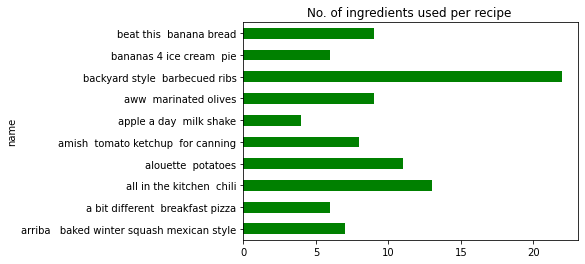

In [18]:
#Plot to show no. of ingredients used for each food recipe
d.plot(x = 'name', 
        y = 'n_ingredients', 
        kind = 'barh', 
        color = 'green', 
        title = 'No. of ingredients used per recipe ', 
        legend = False)
plt.show()

In [20]:
df_recipes.describe()# detailed view of the dataset

,id,minutes,contributor_id,n_steps,n_ingredients,calories,total fat (PDV),sugar (PDV),sodium (PDV),protein (PDV),saturated fat (PDV),carbohydrates (PDV)
count,231637.000000,2.316370e+05,2.316370e+05,231637.000000,231637.000000,231637.000000,231637.00000,231637.000000,231637.000000,231637.00000,231637.000000,231637.000000
mean,222014.708984,9.398546e+03,5.534885e+06,9.765499,9.051153,473.942425,36.08070,84.296865,30.147485,34.68186,45.589150,15.560403
std,141206.635626,4.461963e+06,9.979141e+07,5.995128,3.734796,1189.711374,77.79884,800.080897,131.961589,58.47248,98.235758,81.824560
min,38.000000,0.000000e+00,2.700000e+01,0.000000,1.000000,0.000000,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,99944.000000,2.000000e+01,5.690500e+04,6.000000,6.000000,174.400000,8.00000,9.000000,5.000000,7.00000,7.000000,4.000000
50%,207249.000000,4.000000e+01,1.736140e+05,9.000000,9.000000,313.400000,20.00000,25.000000,14.000000,18.00000,23.000000,9.000000
75%,333816.000000,6.500000e+01,3.982750e+05,12.000000,11.000000,519.700000,41.00000,68.000000,33.000000,51.00000,52.000000,16.000000
max,537716.000000,2.147484e+09,2.002290e+09,145.000000,43.000000,434360.200000,17183.00000,362729.000000,29338.000000,6552.00000,10395.000000,36098.000000


In [21]:
df_recipes.tail()#Last 5 recipes in the dataset

,name,id,minutes,contributor_id,submitted,tags,nutrition,n_steps,steps,description,ingredients,n_ingredients,calories,total fat (PDV),sugar (PDV),sodium (PDV),protein (PDV),saturated fat (PDV),carbohydrates (PDV)
231632,zydeco soup,486161,60,227978,2012-08-29,"['ham', '60-minutes-or-less', 'time-to-make', ...","[415.2, 26.0, 34.0, 26.0, 44.0, 21.0, 15.0]",7,"['heat oil in a 4-quart dutch oven', 'add cele...",this is a delicious soup that i originally fou...,"['celery', 'onion', 'green sweet pepper', 'gar...",22,415.2,26.0,34.0,26.0,44.0,21.0,15.0
231633,zydeco spice mix,493372,5,1500678,2013-01-09,"['15-minutes-or-less', 'time-to-make', 'course...","[14.8, 0.0, 2.0, 58.0, 1.0, 0.0, 1.0]",1,['mix all ingredients together thoroughly'],this spice mix will make your taste buds dance!,"['paprika', 'salt', 'garlic powder', 'onion po...",13,14.8,0.0,2.0,58.0,1.0,0.0,1.0
231634,zydeco ya ya deviled eggs,308080,40,37779,2008-06-07,"['60-minutes-or-less', 'time-to-make', 'course...","[59.2, 6.0, 2.0, 3.0, 6.0, 5.0, 0.0]",7,"['in a bowl , combine the mashed yolks and may...","deviled eggs, cajun-style","['hard-cooked eggs', 'mayonnaise', 'dijon must...",8,59.2,6.0,2.0,3.0,6.0,5.0,0.0
231635,cookies by design cookies on a stick,298512,29,506822,2008-04-15,"['30-minutes-or-less', 'time-to-make', 'course...","[188.0, 11.0, 57.0, 11.0, 7.0, 21.0, 9.0]",9,['place melted butter in a large mixing bowl a...,"i've heard of the 'cookies by design' company,...","['butter', 'eagle brand condensed milk', 'ligh...",10,188.0,11.0,57.0,11.0,7.0,21.0,9.0
231636,cookies by design sugar shortbread cookies,298509,20,506822,2008-04-15,"['30-minutes-or-less', 'time-to-make', 'course...","[174.9, 14.0, 33.0, 4.0, 4.0, 11.0, 6.0]",5,"['whip sugar and shortening in a large bowl , ...","i've heard of the 'cookies by design' company,...","['granulated sugar', 'shortening', 'eggs', 'fl...",7,174.9,14.0,33.0,4.0,4.0,11.0,6.0


In [22]:
#df_user_interaction = df_user_interaction[['user_id','recipe_id','date','rating','review']]
#df_user_interaction.head()

Using Knn Algorithm to classify similar food based on attributes *//Colaborative filtering*

In [23]:
knn_df = df_recipes.copy()
knn_df.drop(['name','id','minutes','contributor_id','submitted','tags', 'nutrition','steps','description','ingredients'],axis =1 ,inplace = True)
knn_df.head()

,n_steps,n_ingredients,calories,total fat (PDV),sugar (PDV),sodium (PDV),protein (PDV),saturated fat (PDV),carbohydrates (PDV)
0,11,7,51.5,0.0,13.0,0.0,2.0,0.0,4.0
1,9,6,173.4,18.0,0.0,17.0,22.0,35.0,1.0
2,6,13,269.8,22.0,32.0,48.0,39.0,27.0,5.0
3,11,11,368.1,17.0,10.0,2.0,14.0,8.0,20.0
4,5,8,352.9,1.0,337.0,23.0,3.0,0.0,28.0


In [24]:
#Using minmaxscaler to scale the dataframe // Feature scaling
min_max_scaler = MinMaxScaler()
knn_df = min_max_scaler.fit_transform(knn_df)
knn_df

array([[7.58620690e-02, 1.42857143e-01, 1.18565191e-04, ...,
        3.05250305e-04, 0.00000000e+00, 1.10809463e-04],
       [6.20689655e-02, 1.19047619e-01, 3.99207846e-04, ...,
        3.35775336e-03, 3.36700337e-03, 2.77023658e-05],
       [4.13793103e-02, 2.85714286e-01, 6.21143466e-04, ...,
        5.95238095e-03, 2.59740260e-03, 1.38511829e-04],
       ...,
       [4.82758621e-02, 1.66666667e-01, 1.36292414e-04, ...,
        9.15750916e-04, 4.81000481e-04, 0.00000000e+00],
       [6.20689655e-02, 2.14285714e-01, 4.32820502e-04, ...,
        1.06837607e-03, 2.02020202e-03, 2.49321292e-04],
       [3.44827586e-02, 1.42857143e-01, 4.02661201e-04, ...,
        6.10500611e-04, 1.05820106e-03, 1.66214195e-04]])

In [25]:
neighbors = NearestNeighbors(n_neighbors=10, algorithm='ball_tree').fit(knn_df)  #KNN algorithm, we look for 10 nearest food recipes
distances, indices = neighbors.kneighbors(knn_df)

In [26]:
all_food_id = list(df_recipes['id'].values)

In [30]:
searched_food = int(input("Enter the food id(From 1-231636):")) #user inputing the food id he likes  
 #Example:486161 is zydeco soup

Enter the food id(From 1-231636):486161


In [31]:
#The searched food name is compared with the dataset with similar attributes with respect to no. of ingredients, no. of steps, nutritional value
searched_food_name = df_recipes.loc[df_recipes['id']==searched_food].head(1).name.tolist()
searched_food_code = all_food_id.index(searched_food)

In [37]:
print("Food recommended similar to : ",searched_food_name[0])#Recommended food based on the input
df_recipes.name.loc[indices[searched_food_code]].to_list()

Food recommended similar to :  zydeco soup


['zydeco soup',
 'pick and mix salad',
 'pasta salad for lunch this week',
 'easy turkey vegetable chili',
 'red bean chili',
 'meaty spaghetti sauce',
 'loaded veggie wraps',
 'stacy s favorite vegetable beef soup',
 'greens and herbs salad with orange ginger vinaigrette',
 'chickie chippie casserole']

In [39]:
df_recipes.loc[indices[searched_food_code]]

,name,id,minutes,contributor_id,submitted,tags,nutrition,n_steps,steps,description,ingredients,n_ingredients,calories,total fat (PDV),sugar (PDV),sodium (PDV),protein (PDV),saturated fat (PDV),carbohydrates (PDV)
231632,zydeco soup,486161,60,227978,2012-08-29,"['ham', '60-minutes-or-less', 'time-to-make', ...","[415.2, 26.0, 34.0, 26.0, 44.0, 21.0, 15.0]",7,"['heat oil in a 4-quart dutch oven', 'add cele...",this is a delicious soup that i originally fou...,"['celery', 'onion', 'green sweet pepper', 'gar...",22,415.2,26.0,34.0,26.0,44.0,21.0,15.0
159328,pick and mix salad,381165,10,450004,2009-07-13,"['15-minutes-or-less', 'time-to-make', 'course...","[270.1, 14.0, 50.0, 18.0, 40.0, 23.0, 11.0]",7,['choose an ingredient from each of the 6 grou...,this is from jamie oliver's ministry of food c...,"['lettuce', 'watercress', 'cos lettuce', 'gem ...",22,270.1,14.0,50.0,18.0,40.0,23.0,11.0
153792,pasta salad for lunch this week,361789,25,50509,2009-03-19,"['30-minutes-or-less', 'time-to-make', 'course...","[722.0, 46.0, 13.0, 19.0, 40.0, 25.0, 33.0]",7,"['cook the pasta as per package instructions',...",this recipe came from real simple. it's one th...,"['penne', 'olive oil', 'canned chick-peas', 'a...",22,722.0,46.0,13.0,19.0,40.0,25.0,33.0
78491,easy turkey vegetable chili,510191,45,223441,2013-12-01,"['weeknight', '60-minutes-or-less', 'time-to-m...","[429.2, 13.0, 57.0, 54.0, 50.0, 8.0, 23.0]",7,"['heat oil in large skillet', 'add pepper , on...",hearty and healthy chili recipe. great for aft...,"['olive oil', 'bell pepper', 'onion', 'celery'...",22,429.2,13.0,57.0,54.0,50.0,8.0,23.0
171840,red bean chili,232727,80,353579,2007-06-06,"['time-to-make', 'course', 'main-ingredient', ...","[547.6, 15.0, 76.0, 78.0, 48.0, 7.0, 28.0]",7,['heat oil in pan and fry onion for 2-3 minute...,from taste of the caribbean. a flavorful meat...,"['vegetable oil', 'onion', 'crushed tomatoes',...",22,547.6,15.0,76.0,78.0,48.0,7.0,28.0
132869,meaty spaghetti sauce,265111,150,164913,2007-11-13,"['time-to-make', 'course', 'preparation', 'for...","[107.8, 9.0, 16.0, 17.0, 13.0, 10.0, 2.0]",7,"['in a large stockpot cook the ground beef , s...",i make a double batch of this and freeze half ...,"['lean ground beef', 'pork sausage', 'pepperon...",22,107.8,9.0,16.0,17.0,13.0,10.0,2.0
125268,loaded veggie wraps,391056,120,1383715,2009-09-21,"['time-to-make', 'course', 'main-ingredient', ...","[509.4, 21.0, 18.0, 45.0, 35.0, 14.0, 26.0]",6,['process all ingredients in step #1 in the fo...,"i got this recipe from my mother-in-law, donna...","['vidalia onion', 'garlic cloves', 'ginger', '...",22,509.4,21.0,18.0,45.0,35.0,14.0,26.0
198919,stacy s favorite vegetable beef soup,148068,105,185105,2005-12-12,"['time-to-make', 'course', 'main-ingredient', ...","[330.5, 11.0, 38.0, 63.0, 53.0, 11.0, 13.0]",8,"['heat vegetable oil in a large stew pot', 'ad...",this is a soup that i have concocted under the...,"['beef stew meat', 'vegetable oil', 'beef brot...",22,330.5,11.0,38.0,63.0,53.0,11.0,13.0
98009,greens and herbs salad with orange ginger vina...,256065,15,306106,2007-09-28,"['15-minutes-or-less', 'time-to-make', 'course...","[306.6, 32.0, 60.0, 23.0, 16.0, 25.0, 8.0]",8,"['mix greens and herbs together', 'add celery ...","this is a versatile salad, so mix it up (no pu...","['red leaf lettuce', 'lettuce', 'iceberg lettu...",22,306.6,32.0,60.0,23.0,16.0,25.0,8.0
47013,chickie chippie casserole,405301,50,1236155,2009-12-29,"['60-minutes-or-less', 'time-to-make', 'course...","[156.0, 16.0, 10.0, 13.0, 15.0, 31.0, 2.0]",8,['in a small saucepan melt butter and whisk in...,a hybrid of hot chicken salad and a one-dish b...,"['unsalted butter', 'flour', 'salt', 'pepper',...",22,156.0,16.0,10.0,13.0,15.0,31.0,2.0


*You can see the similar food recipes with same no. of ingredients, no. of steps to make the food, similar nutrional value*

End of code